<a href="https://colab.research.google.com/github/RGologorsky/fastmri/blob/master/DeepPit_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount Google Drive
from google.colab import drive
from pathlib import Path 

ROOT = "/content/drive"    
drive.mount(ROOT)

# Useful paths
PROJ_PATH            = Path(ROOT)/"My Drive/PitProj/"

Mounted at /content/drive


# Viz 

Viz 3d MR expressed as a numpy array:
- Coronal: Axis 0 + Axis 1, Axis 2 = slice index
- Sagittal: Axis 0 + Axis 2, Axis 1 = slice index
- Axial: Axis 1 + Axis 2, Axis 0 = slice index

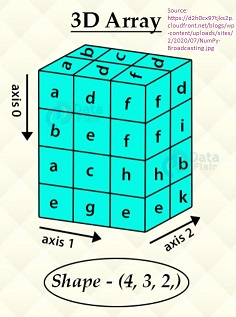

In [3]:
from IPython.display import Image
pic_path = f"{PROJ_PATH}/pics/np_axes_illustration.jpg"
Image(pic_path, width=400, height=200)

## Viz Fn

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec

def viz_ras(np_arr, slices, view, nrows = 1, ncols = 1, wspace=0.0, hspace=0.0, fig_mult=1, cmap="rainbow", bin_mask_arr=None):
  n_slices = len(slices)
  if nrows * ncols == 1: nrows, n_cols = 1, n_slices

  fixed_axis = {"axial": 0, "sagittal":1, "coronal":2}[view]

  # from SO: https://stackoverflow.com/questions/41071947/how-to-remove-the-space-between-subplots-in-matplotlib-pyplot
  fig = plt.figure(figsize=(fig_mult*(ncols+1), fig_mult*(nrows+1))) 
  gs  = gridspec.GridSpec(nrows, ncols,
    wspace=wspace, hspace=hspace, 
    top=1.-0.5/(nrows+1), bottom=0.5/(nrows+1), 
    left=0.5/(ncols+1), right=1-0.5/(ncols+1)) 

  index = 0
  for row in range(nrows):
    for col in range(ncols):
      ax = plt.subplot(gs[row,col])
      ax.set_title(f"Slice {slices[index]}")
      
      # show ticks only on 1st im
      if index != 0:
        ax.set_xticks([])
        ax.set_yticks([])

      if index < n_slices: 
        ax.imshow(np.take(np_arr, slices[index], fixed_axis))
        # overlay binary mask if provided
        if bin_mask_arr is not None:
          ax.imshow(np.take(bin_mask_arr, slices[index], fixed_axis), cmap="gray", alpha=0.4)

      else: 
        ax.imshow(np.full((1,1,3), 255)) # show default white image of size 1x1
      
      index += 1
  
  plt.set_cmap(cmap)
  plt.show()
  # return plt

# Test

### Nifti

In [22]:
%%capture

# pip install 
!pip install pydicom
!pip install meshio
!pip install nibabel
!pip install nilearn

In [23]:
# import
import pydicom as pyd
import meshio
import nibabel as nib
import nilearn as nil

# choose a nii file
nii_folder = f"{PROJ_PATH}/play"
nii_file = f"{nii_folder}/ABIDE_50454_MRI_MP-RAGE_br_raw_20120830175600888_S164683_I328693 (1).nii"

# SEG_PATH = NIFTI_FOLDER/"Segmentation.obj"

# get the underlying MR in RAS+ = canonical coords
nii_arr = nib.load(nii_file)
print("NifTi coord system (original)", nib.aff2axcodes(nii_arr.affine), sep="\n")

# Convert to RAS+ = canonical coords
np_arr = nib.as_closest_canonical(nii_arr).get_fdata(dtype=np.float32)
print("MR shape: ", np_arr.shape, " (axial, sagittal, coronal)")

NifTi coord system (original)
('L', 'A', 'S')
MR shape:  (160, 480, 512)  (axial, sagittal, coronal)


##### Viz binary mask

In [25]:
# get binary mask associated w/ ROI
np_roi_arr   =  np.load(f"{PROJ_PATH}/dicom_img_numpy_array.npy")
bin_mask_arr =  np.load(f"{PROJ_PATH}/binary_segmentation_mask.npy")

print(f"np ROI shape: {np_roi_arr.shape}. Binary mask: {bin_mask_arr.shape}")

np ROI shape: (160, 480, 512). Binary mask: (160, 480, 512)


In [26]:
# see which slices contain ROI
print(f"ROI contains {np.count_nonzero(bin_mask_arr)} elements")
print(f"Slices of interest: ", np.unique(np.nonzero(bin_mask_arr)[0]))

# idxs = range(0,30)
# a = np.nonzero(bin_mask_arr)[0][idxs]
# b = np.nonzero(bin_mask_arr)[1][idxs]
# c = np.nonzero(bin_mask_arr)[2][idxs]

# print(a)
# print(b)
# print(c)

ROI contains 148639 elements
Slices of interest:  [62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85
 86 87 88 89 90 91 92 93 94 95]


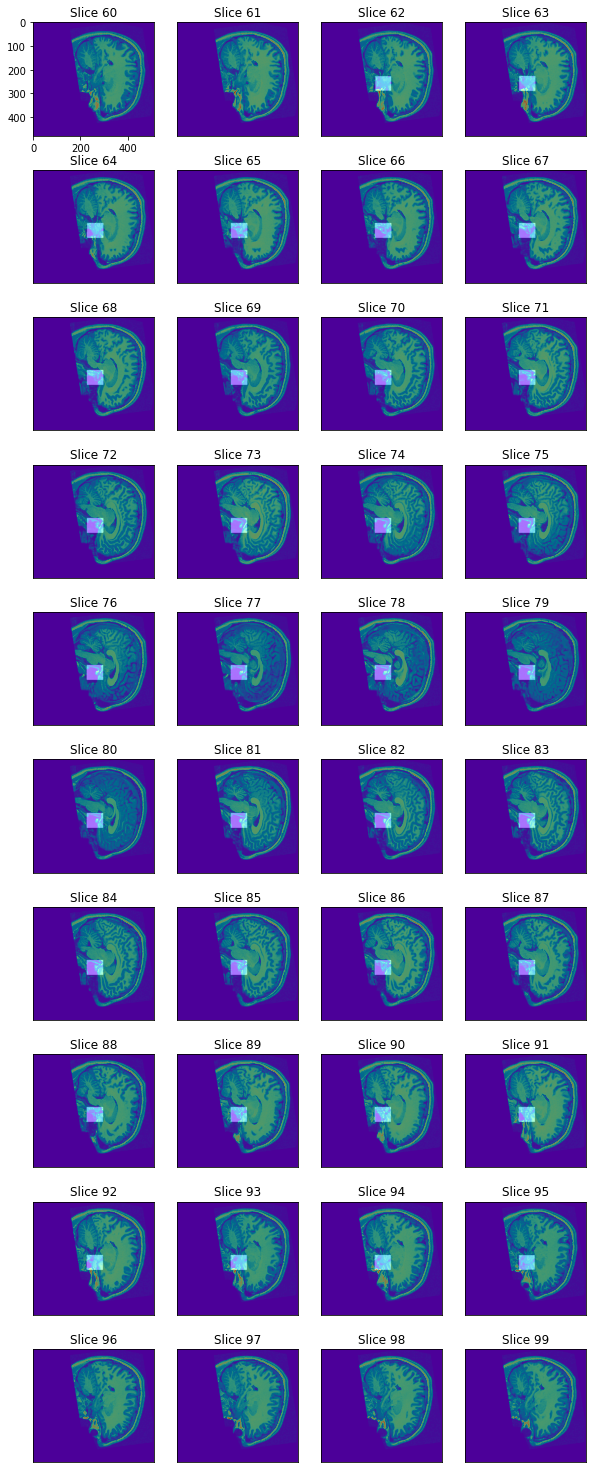

In [27]:
viz_ras(np_roi_arr, slices=range(60, 100), view="axial", nrows=10, ncols=4, hspace=0.3, fig_mult=2, bin_mask_arr=bin_mask_arr)

#### Viz axial

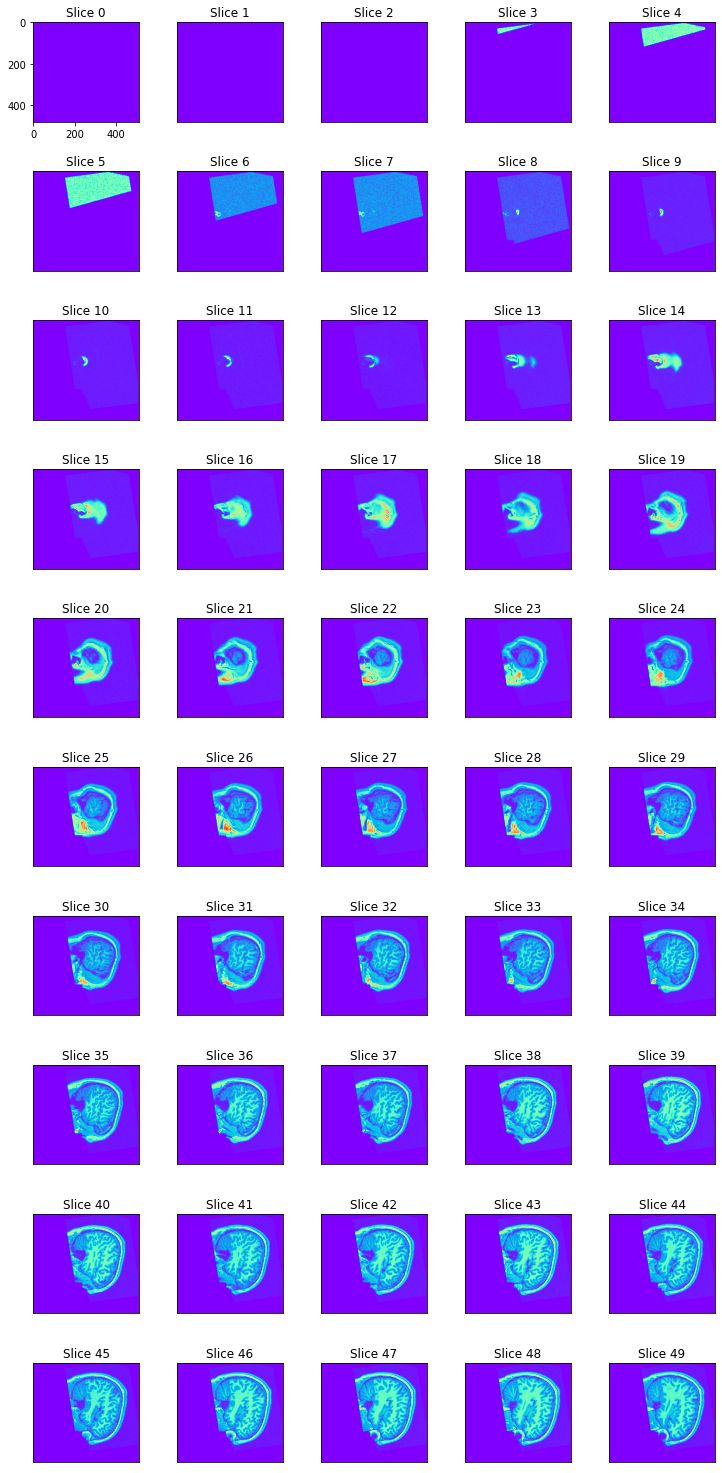

In [24]:
viz_ras(np_arr, slices=range(0,50), view="axial", nrows=10, ncols=5, hspace=0.5, fig_mult=2)

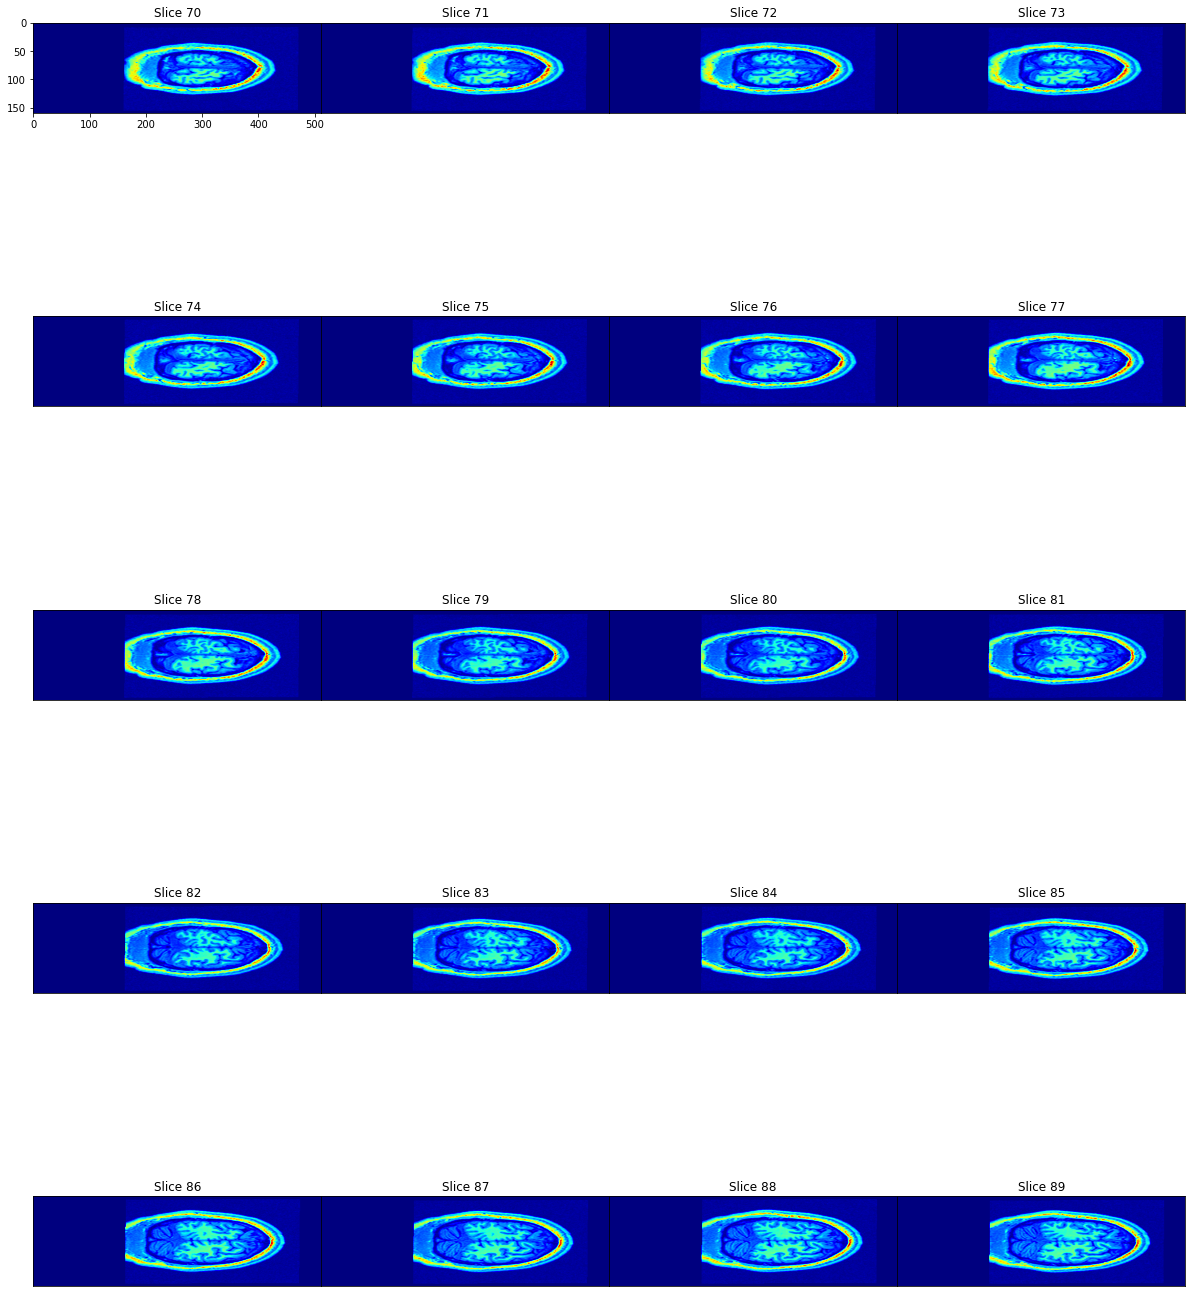

In [15]:
viz_ras(np_roi_arr, slices=range(70,90), view="sagittal", nrows=5, ncols=4, hspace=0.1, fig_mult=4)

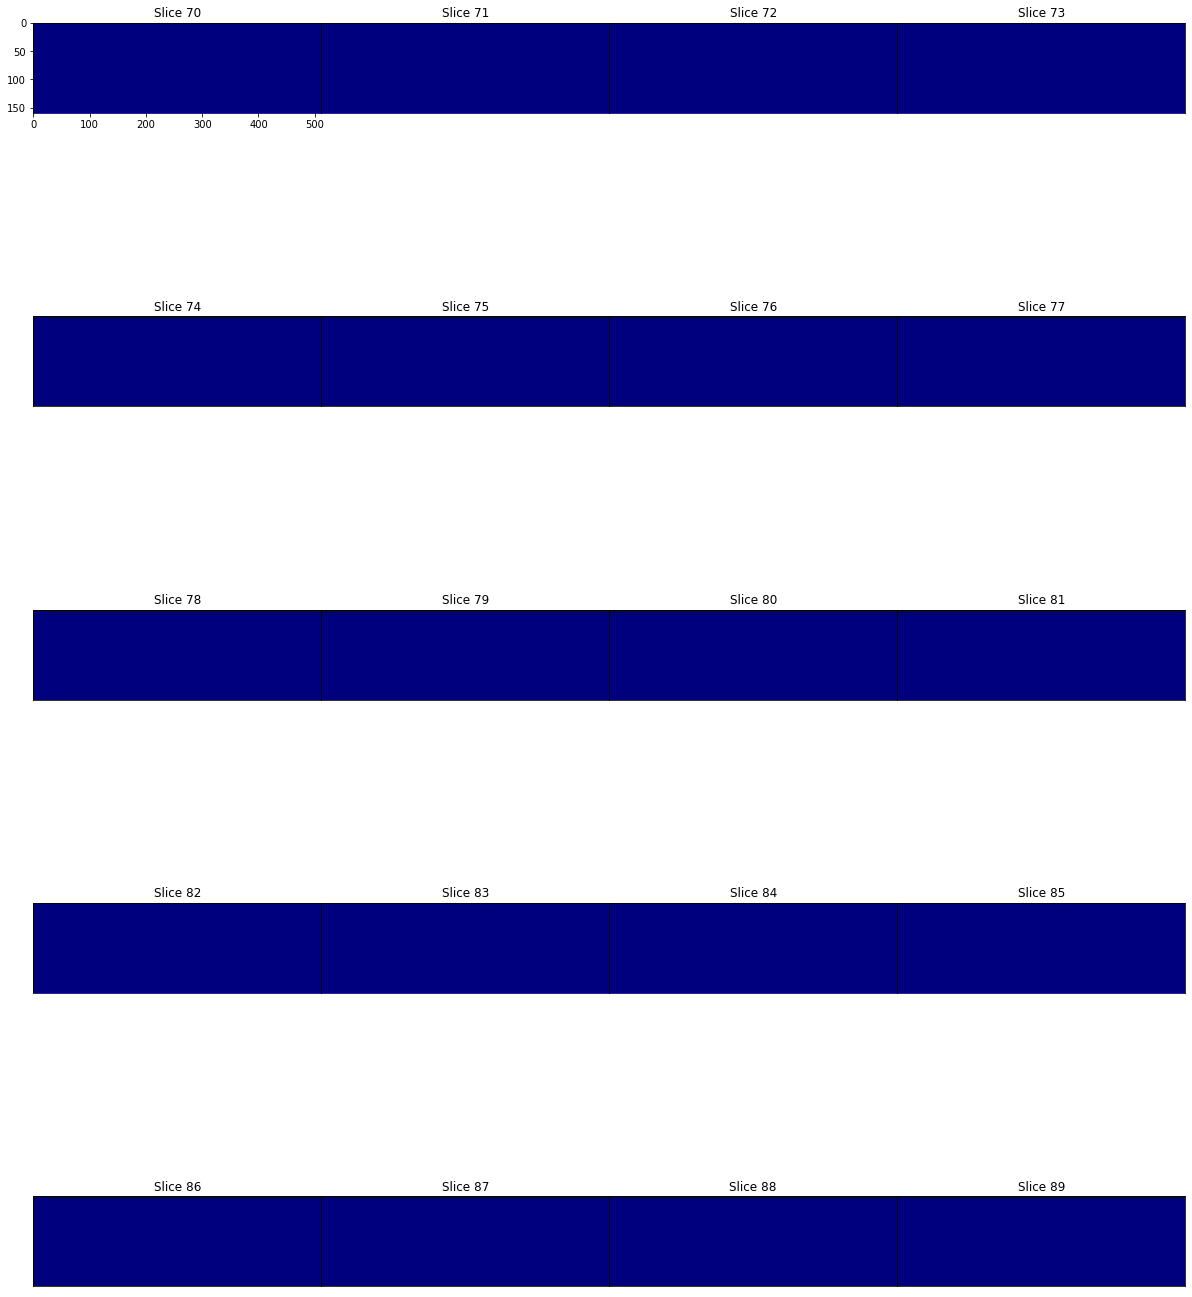

In [16]:
viz_ras(bin_mask_arr, slices=range(70,90), view="sagittal", nrows=5, ncols=4, hspace=0.1, fig_mult=4,  cmap='gray')

#### Viz sagittal

##### slices 0-50

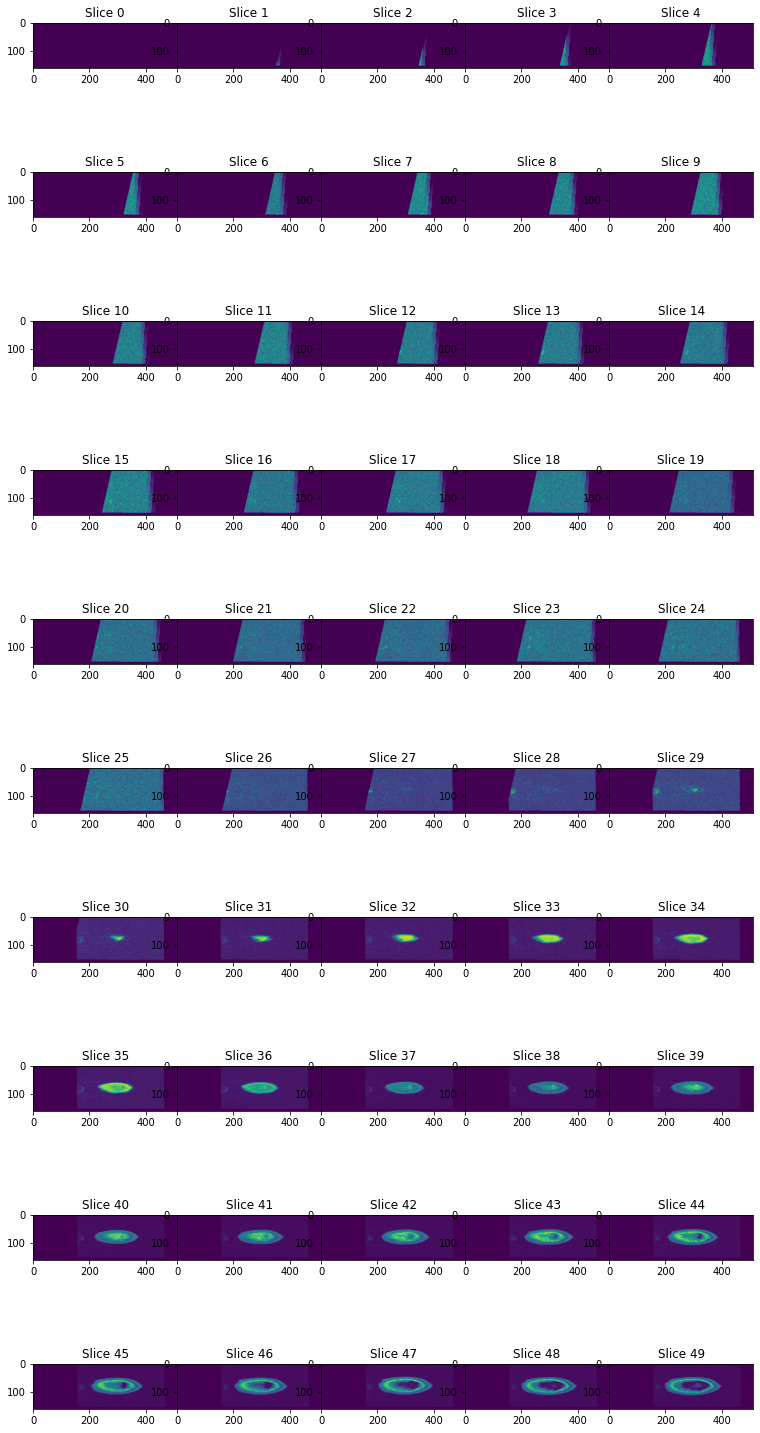

In [ ]:
viz_ras(np_arr, slices=range(0,50), view="sagittal", nrows=10, ncols=5, hspace=0.5, fig_mult=2)

##### slices 50-100

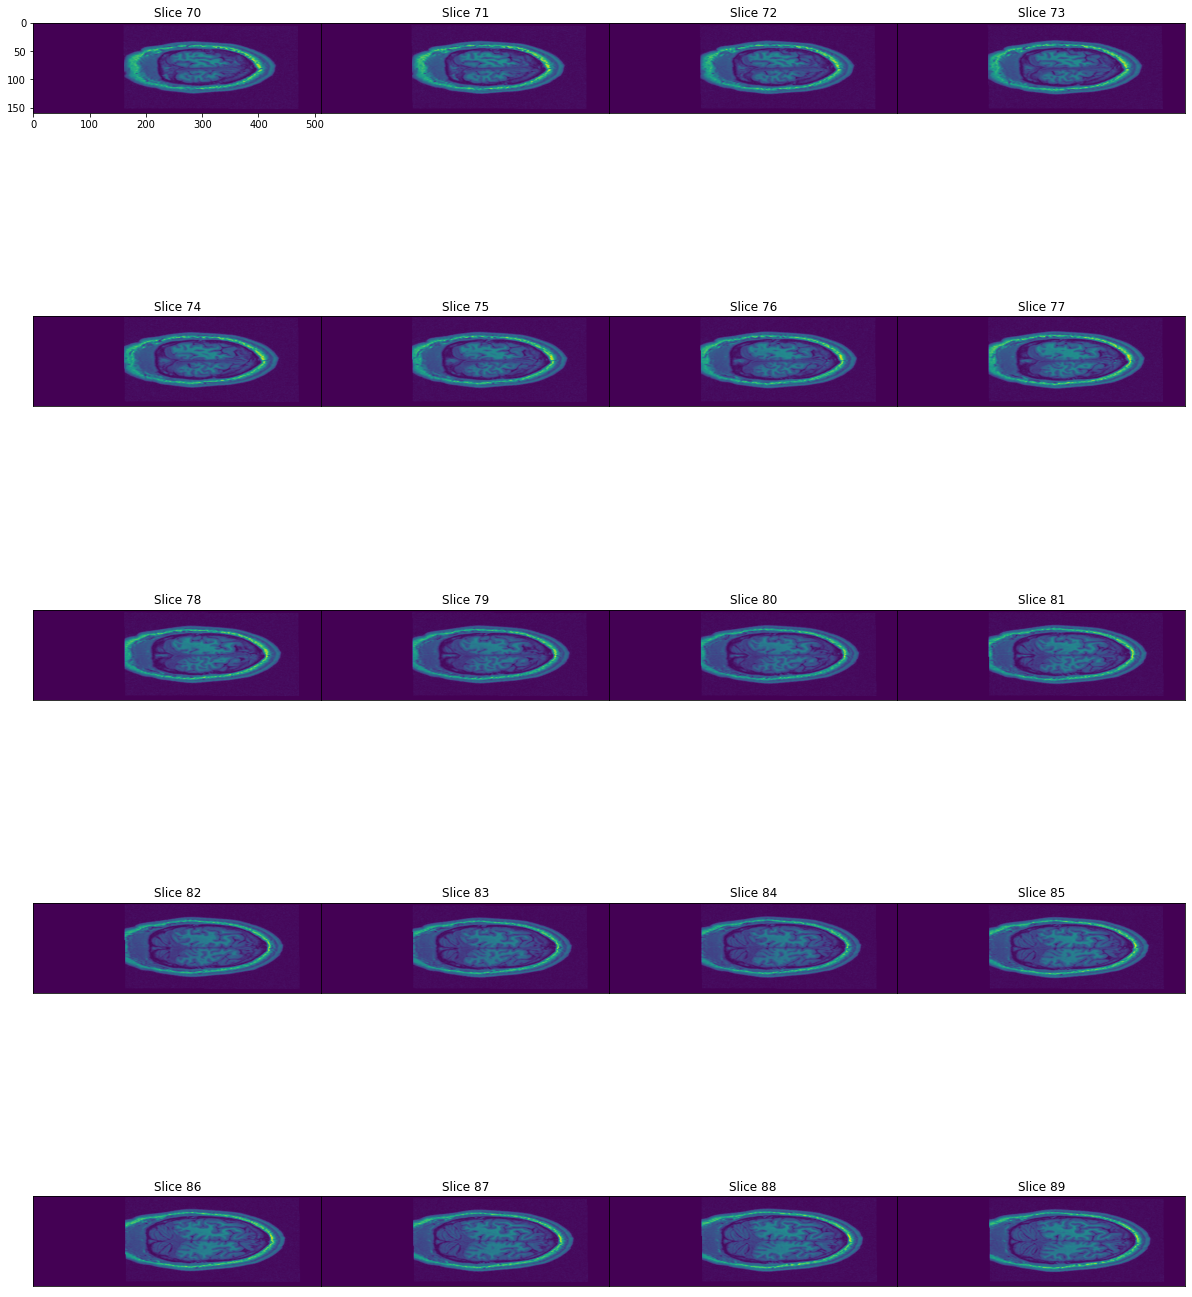

In [32]:
viz_ras(np_arr, slices=range(70,90), view="sagittal", nrows=5, ncols=4, hspace=0.1, fig_mult=4)

#### Viz coronal

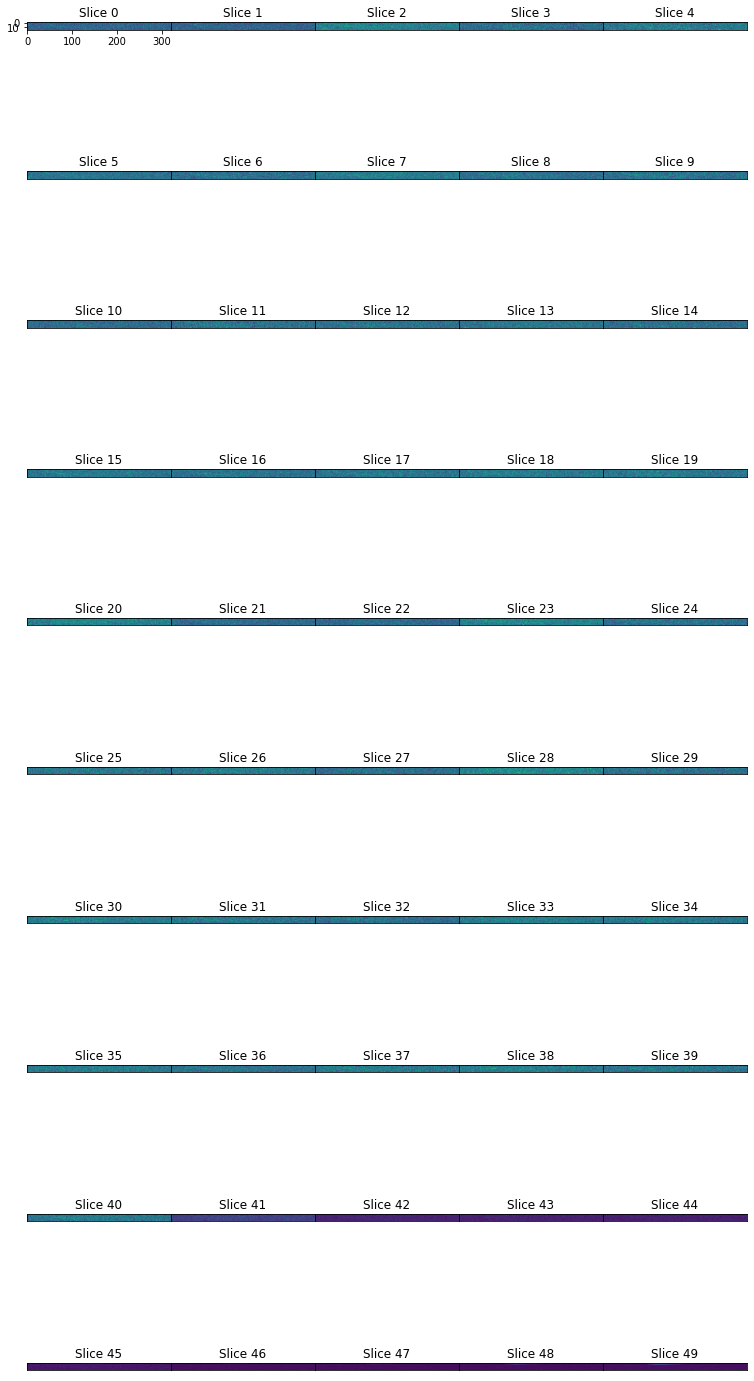

In [18]:
viz_ras(np_arr, slices=range(0,50), view="coronal", nrows=10, ncols=5, hspace=0.5, fig_mult=2)

### fastMRI 

H5 files

In [5]:
%matplotlib inline

import os
import h5py

# choose a h5 file
h5_folder = f"{PROJ_PATH}/multicoil_val"
h5_files = os.listdir(h5_folder)
print(f"{len(h5_files)} files:", *h5_files, sep="\n")

idx = 0
hf = h5py.File(f"{h5_folder}/{h5_files[idx]}", mode="r")

# get the underlying MR
np_arr = hf['reconstruction_rss'][()]
print("MR shape: ", np_arr.shape)

8 files:
file_brain_AXFLAIR_200_6002471.h5
file_brain_AXFLAIR_200_6002462.h5
file_brain_AXT1POST_200_6001976.h5
file_brain_AXT1POST_200_6001979.h5
file_brain_AXT1PRE_200_6002087.h5
file_brain_AXT1PRE_200_6002079.h5
file_brain_AXT1_201_6002725.h5
file_brain_AXT1_201_6002736.h5
MR shape:  (16, 320, 320)


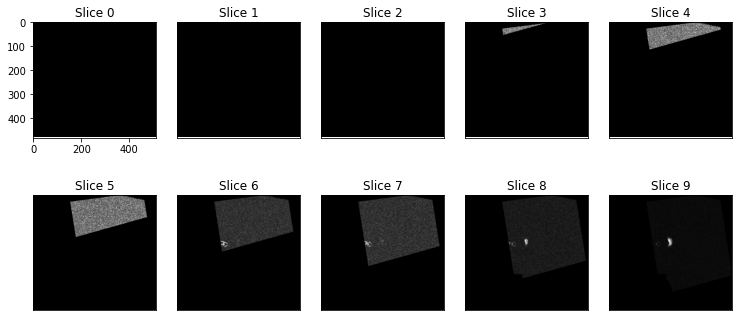

In [19]:
# viz
viz_ras(np_arr, slices=range(0,10), view="axial", nrows=2, ncols=5, hspace=0.5, fig_mult=2)

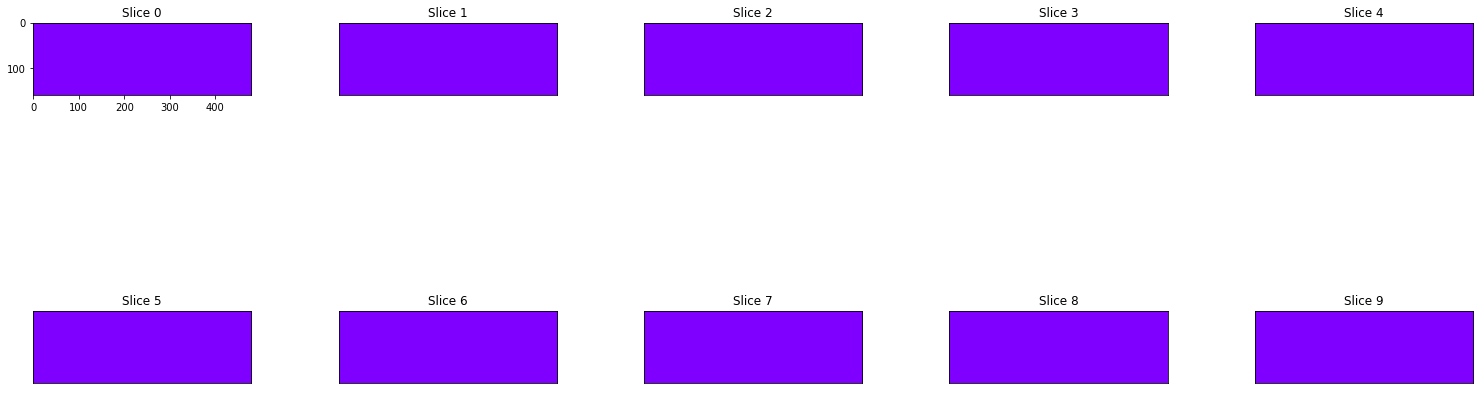

In [21]:
viz_ras(np_arr, slices=range(0,10), view="coronal", nrows=2, ncols=5, fig_mult=4, wspace=0.4)

In [ ]:
# MR coordinate systems: https://www.slicer.org/wiki/Coordinate_systems
# MR Image coordinate system:
# ijk coords for a cube/rectangular prism: i is left to right, j = top to bottom, k = front to back (ie slice number)

# Numpy coordinate system: https://www.pythoninformer.com/python-libraries/numpy/index-and-slice/
# ijk coords for a cube/rectangular prism: k is left to right, j = top to bottom, i = front to back (ie slice number)

def mr_3d_bounding_box_crop(mr_3d, top_left, bottom_right):
  """ 
  input: 3d array of MR slices, ijk 3-tuple of top left and bottom right crop location
  output: 3d array of MR slices cropped from top left to bottom right 
  """
  i_start, j_start, k_start = top_left
  i_end, j_end, k_end       = bottom_right
  return mr_3d[k_start:k_end, j_start:j_end, i_start:i_end]